In [111]:
import pandas as pd
import quandl
import math,datetime
import numpy as np
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [112]:
style.use('ggplot')

In [113]:
df = quandl.get('WIKI/GOOGL')

In [114]:
print (df.head)

<bound method DataFrame.head of                 Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                        
2004-08-19   100.010   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.010   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.760   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.240   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.760   108.00   103.88   106.000   9188600.0          0.0   
2004-08-26   104.950   107.95   104.66   107.910   7094800.0          0.0   
2004-08-27   108.100   108.62   105.69   106.150   6211700.0          0.0   
2004-08-30   105.280   105.49   102.01   102.010   5196700.0          0.0   
2004-08-31   102.320   103.71   102.16   102.370   4917800.0          0.0   
2004-09-01   102.700   102.97    99.67   100.250   9138200.0          0.0   
2004-09-02    99.090   102.37    98.94   101

In [115]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]

In [116]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']*100;

In [117]:
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100;

In [118]:
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume',]]

In [119]:
print (df.head)

<bound method DataFrame.head of              Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                      
2004-08-19    50.322842  3.712563    0.324968   44659000.0
2004-08-20    54.322689  0.710922    7.227007   22834300.0
2004-08-23    54.869377  3.729433   -1.227880   18256100.0
2004-08-24    52.597363  6.417469   -5.726357   15247300.0
2004-08-25    53.164113  1.886792    1.183658    9188600.0
2004-08-26    54.122070  0.037068    2.820391    7094800.0
2004-08-27    53.239345  2.326896   -1.803885    6211700.0
2004-08-30    51.162935  3.411430   -3.106003    5196700.0
2004-08-31    51.343492  1.308977    0.048866    4917800.0
2004-09-01    50.280210  2.713217   -2.385589    9138200.0
2004-09-02    50.912161  0.847207    2.442224   15118600.0
2004-09-03    50.159839  1.729827   -0.931154    5152400.0
2004-09-07    50.947269  0.413467    0.564301    5847500.0
2004-09-08    51.308384  0.713587    1.548541    4985600.0
2004-09-09    51.313400 

In [ ]:
#Regression Features and Labels

In [120]:
forecast_col = 'Adj. Close'
df.fillna(-9999, inplace=True)

In [121]:
forecast_out = int(math.ceil(0.1*len(df)))

In [122]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [123]:
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335


In [ ]:
##Regression Training and Testing

In [124]:
X = np.array(df.drop(['label'],1)) #X is feature
#X = X[:-forecast_out]
#X_lately = X[-forecast_out:]
y = np.array(df['label'])    ##y i s label

In [126]:
X = preprocessing.scale(X)
y = np.array(df['label'])

In [127]:
print(len(X),len(y))

(3081, 3081)


In [128]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size =0.2)

In [129]:
clf = svm.SVR(kernel= 'poly')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
accuracy1 = clf.score(X_test,y_test)

In [130]:
print accuracy1

0.6095972490370012


In [72]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
accuracy2 = clf.score(X_test,y_test)

In [73]:
print accuracy2

0.7633154341740203


In [74]:
clf = svm.SVR(kernel= 'linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
accuracy3 = clf.score(X_test,y_test)

In [75]:
print accuracy3

0.7547626342613576


In [ ]:
##Regression forecasting and predicting

In [82]:
forecast_set = clf.predict(X_lately)

In [84]:
print(forecast_set,accuracy,forecast_out)

(array([-12721228.42936351, -17561238.70734987, -11129639.08777118,
       -20512655.17290377, -18654094.3619762 , -12979679.78203027,
       -10909970.81630193, -11201815.95645914, -13401778.58675469,
       -10725943.59499368, -15165233.35458428, -17402625.47906717,
       -20799881.70792945, -20340661.0012535 , -19165214.64303613,
       -16072760.40860064, -14273858.31091971, -14913609.80024029,
       -28484457.33600906, -26960191.2463212 , -21377106.0837662 ,
       -22891390.01737344, -33954919.72006927, -20032562.27134452,
       -17213834.6675012 ,  -9636499.13324455, -18492851.99097319,
       -17825270.76923789, -23825807.34222153, -17577128.47109414,
       -15439203.78448023, -13428080.63235101, -14602863.99145018,
       -14070213.59701911, -11245509.16521624, -17737290.98082196,
       -20339801.09298511, -24944849.15669985, -10728908.28367382,
       -10309016.79762086,  -8636992.93284994,  -9135310.6284102 ,
       -10485718.79910596, -16649093.77297003, -11220075.3338

In [88]:
df['Forecast'] = np.nan

In [91]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


In [98]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for in range((len(df.columns)-1)] + [i]

SyntaxError: invalid syntax (<ipython-input-98-e3605f2717b9>, line 4)

In [99]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

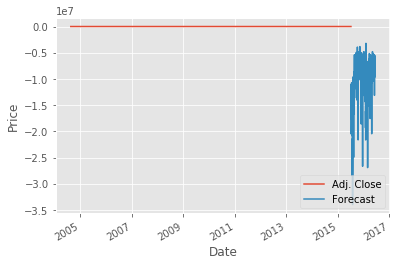

In [100]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()